In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sympy as sp

In [9]:
from scipy.stats import skew, kurtosis, norm


In [10]:
from sympy import symbols
from sympy.stats import Normal, density, E, std

# Определяем символьные переменные
X1, X2, X3, X4, X5 = symbols("X1 X2 X3 X4 X5")

# Задаем параметры нормальных распределений
mu = [5, -7, 4, 9, -0.15]  # Средние значения для каждой компоненты
sigma = [1, 2, 0.5, 3, 0.1]  # Стандартные отклонения для каждой компоненты

# Определяем нормальные случайные переменные
X1_var = Normal("X1", mu[0], sigma[0])
X2_var = Normal("X2", mu[1], sigma[1])
X3_var = Normal("X3", mu[2], sigma[2])
X4_var = Normal("X4", mu[3], sigma[3])
X5_var = Normal("X5", mu[4], sigma[4])

# Создаем вектор случайных переменных
random_vector = [X1_var, X2_var, X3_var, X4_var, X5_var]

# Выводим параметры случайных переменных
for var, mean, std_dev in zip(random_vector, mu, sigma):
    print(f"{var}: Mean = {E(var)}, Standard Deviation = {std(var)}")

X1: Mean = 5, Standard Deviation = 1
X2: Mean = -7, Standard Deviation = 2
X3: Mean = 4, Standard Deviation = 0.500000000000000
X4: Mean = 9, Standard Deviation = 3
X5: Mean = -0.150000000000000, Standard Deviation = 0.100000000000000


---

# 2.4


In [11]:
from scipy.stats import uniform, expon


In [12]:
from sympy import *
from sympy.abc import x, y

t = integrate("1/(2*pi) * e**(-x**2-3*x*y-5/2*y**2-6*x-10*y-10)", (y, -oo, oo))
t

Integral(e**(-x**2 - 3*x*y - 6*x - 5*y**2/2 - 10*y - 10), (y, -oo, oo))/(2*pi)

In [13]:
itegraee


NameError: name 'itegraee' is not defined

In [ ]:
a, b = 2, 5
k = 10**4
x = uniform.rvs(loc=a, scale=b - a, size=k)
Y = expon.rvs(scale=1 / x, size=k)
Y.mean(), Y.var()


(0.30833862103993287, 0.10982443473874541)

In [ ]:
a, b = 2, 5
k = 10**4
x = uniform(loc=a, scale=b - a).rvs(k)
Y = expon(scale=1 / x).rvs(k)
Y.mean(), Y.var()


(0.3049028740334739, 0.10744469017393349)

In [ ]:
expon(a, b - a).rvs(100000).mean()

5.006800753243168

---

# 3.1


In [ ]:
def ecscess(mas):
    """
    Ищет эксцесс и четвертый эмпирический момент

    Args:
        mas (list): Список данных

    Returns:
        tuple: эксцесс, момент
    """
    # 4-й имперический момент
    m4 = (mas - mas.mean() ** 4).mean()

    # Эксцесс
    E = m4 / mas.var() ** 4

    return E, m4

In [ ]:
cosl = np.cos(np.arange(1, 101))
sinl = np.sin(np.arange(1, 101))


In [ ]:
# а
sinl.mean(), sinl.std()


(-0.0012717101366042016, 0.7090008871157724)

In [ ]:
# б
ecscess(sinl)


(-0.019916540568111096, -0.0012717101392196672)

In [ ]:
skew(sinl, bias=True)


0.005957063514864488

In [ ]:
# Эксцесс
kurtosis(sinl)


-1.5081297338390796

c:\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


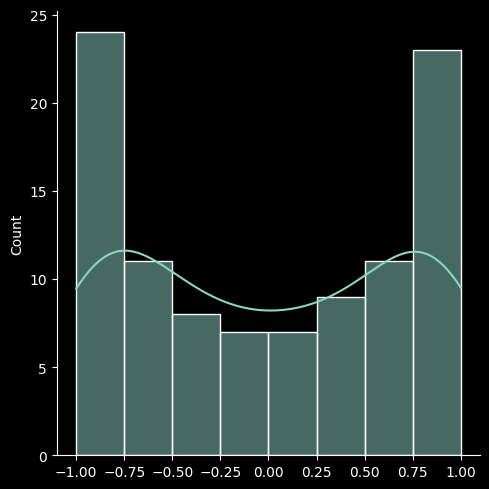

In [ ]:
sns.displot(sinl, kde=True)


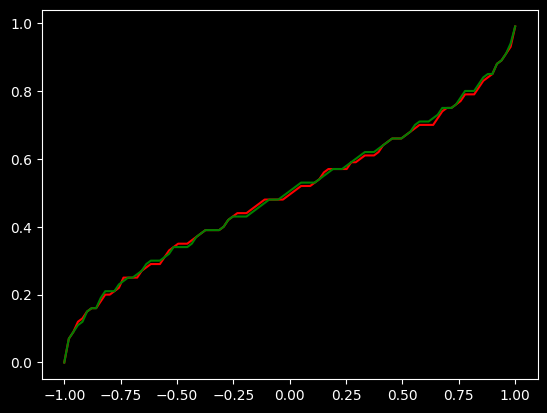

In [ ]:
# в, г
def dest(mas):
    mas = np.array(mas)
    l = len(mas)

    def f(x):
        return sum(mas < x) / l

    return f


f_sin = dest(sinl)
f_cos = dest(cosl)
X_sin = np.linspace(min(sinl), max(sinl), 100)
Y_sin = [f_sin(i) for i in X_sin]
X_cos = np.linspace(min(cosl), max(cosl), 100)
Y_cos = [f_cos(i) for i in X_cos]
plt.plot(X_sin, Y_sin, "r")
plt.plot(X_cos, Y_cos, "g")


---

# 3.2


In [18]:
def is_even(num):
    if num % 2 == 0 or num == 1:
        return False
    for i in range(3, int(num**0.5) + 1, 2):
        if num % i == 0:
            return False
    return True


def even_range(start, stop=None):
    if stop is None:
        stop = start
        start = 0
    for i in range(start, stop):
        if is_even(i):
            yield i


mas = np.array(list(even_range(3, 99992)))

In [19]:
# Смещение
skew(mas)


0.08788574351776704

In [17]:
# Эксцесс
kurtosis(np.hstack([mas, -mas]))


-1.0926019048834879

---

# 3.3


In [21]:
mas = np.array(list(even_range(10, 100)))
mas


array([11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73,
       79, 83, 89, 97])

In [44]:
# Среднее геометрическое
G = scipy.stats.gmean(mas)
G


41.781014648871015

In [30]:
# Среднее гармоническое
scipy.stats.hmean(mas)


33.51277429915806

In [32]:
def power_mean(mas, a=2):
    mas = np.array(mas)
    return (mas**a).mean() ** (1 / a)

In [35]:
power_mean(mas, 3)


60.697103107111786

In [41]:
np.random.seed(1223)
G5 = np.random.choice(mas, 5)
G5

array([47, 97, 97, 79, 79])

---
# 3.4

In [54]:
np.random.seed(1223)
t = []
for i in range(10000):
    G5 = np.random.choice(mas, 5)
    t.append(scipy.stats.gmean(G5))
(np.array(t) < G).mean()

0.478

In [59]:
np.random.seed(1223)
t = []
for i in range(10000):
    G5 = np.random.choice(mas, 5)
    t.append(scipy.stats.gmean(G5))
np.mean(t)
# plt.hist(t)

43.60887490814362